In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dropout,LSTM,Dense
from keras.layers import LeakyReLU


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import hilbert_data1_jgrjd_20CRV3


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, plot_tree, XGBRegressor
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
#import hilbert_data 

In [3]:
!pwd

/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/stacked_lstm_butter_filter


### Test and Train Splitter:

In [4]:
x_train,_,y_train = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
#y_train.head()

(10839, 24) (10839, 1) (1266, 24) (1266, 1)


In [6]:
abs(x_train.describe()) - abs(x_test.describe())

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,8,9,10,11
count,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,...,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03,9.573000e+03
mean,-4.914031,-5.198544,-5.033501,-2.549740,-2.362272,-4.485992,-5.878258,-11.244618,-2.433893,0.198505,...,-1.172219e-15,8.226222e-16,-2.048346e-15,-1.152915e-15,-1.686937e-15,-9.128096e-15,-8.155316e-16,4.217656e-16,-9.772445e-16,1.226735e-16
std,3.196857,4.476287,6.180118,2.492246,1.215964,-3.703609,-14.983236,-14.056821,7.303989,-5.854388,...,6.180118e+00,2.492325e+00,1.215964e+00,-3.703590e+00,-1.498320e+01,-1.405678e+01,7.304006e+00,-5.854384e+00,7.203336e-02,8.043589e+00
min,209.659405,238.492940,123.007589,608.361983,151.500730,109.746520,490.271573,136.636144,119.468787,36.906984,...,1.308910e+02,2.599727e+02,5.698100e+01,6.679007e+01,3.546816e+02,9.027031e+01,1.487418e+02,1.179819e+02,3.882528e+01,1.764518e+02
25%,1.801376,5.381608,10.662282,3.528324,1.845343,-3.801036,-14.750576,1.387998,8.707645,-9.050034,...,1.325089e+00,-1.089901e+01,-1.479941e+00,1.189516e+00,-1.752121e+01,-5.830856e+00,1.496780e+00,-3.773418e+00,-5.278856e+00,-3.609312e+00
50%,-3.904664,-5.869943,-4.097264,8.237257,-2.808175,-1.250538,-10.688725,-19.128617,0.003286,-0.092108,...,-6.018215e+00,-3.169154e+00,-9.131105e-01,-3.597421e+00,-6.382689e+00,-1.326185e+00,5.719418e-01,1.082845e+00,-1.477513e+00,-1.246335e+00
75%,-2.927407,-4.799758,-2.662550,8.438723,1.988340,-9.520705,-25.887864,-25.433189,0.834612,-1.920960,...,7.011618e+00,-7.374210e+00,-1.010591e+00,8.517585e-02,-1.481155e+01,-1.301940e+01,8.630063e+00,-2.630960e+00,-1.115704e+00,5.533671e+00
max,76.830826,38.496369,137.598365,154.381602,100.972507,-4.540059,14.405006,214.398722,98.478799,-49.648344,...,4.253812e+01,2.682348e+02,1.069972e+02,5.903839e+01,2.600386e+01,1.541164e+02,1.830061e+01,-1.495992e+01,6.117708e+01,1.450285e+02


In [7]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,8,9,10,11
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,...,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03
mean,5.233608,5.565855,5.135667,2.584039,2.371393,4.790862,6.065351,11.303929,2.563490,-0.271557,...,-1.620610e-15,-3.928751e-15,2.564913e-15,-1.386288e-15,2.559301e-15,-9.358847e-15,-3.398370e-15,2.424601e-15,-1.536422e-15,1.627626e-15
std,93.817666,99.075077,99.553767,177.867649,93.294836,97.431058,166.592326,167.933574,78.382733,90.698501,...,9.955377e+01,1.778676e+02,9.329484e+01,9.743104e+01,1.665923e+02,1.679335e+02,7.838272e+01,9.069850e+01,8.704797e+01,9.460567e+01
min,-248.984831,-244.945849,-351.046617,-535.755477,-242.277224,-268.793417,-573.165923,-710.444837,-242.246951,-293.219303,...,-2.874718e+02,-5.434558e+02,-2.617727e+02,-3.088429e+02,-5.166306e+02,-6.448074e+02,-2.035821e+02,-2.204444e+02,-2.572219e+02,-2.336523e+02
25%,-60.281184,-62.194344,-60.633512,-105.078337,-60.856252,-64.391076,-110.601448,-86.196371,-48.913138,-61.390305,...,-6.759234e+01,-1.199815e+02,-6.516978e+01,-6.218587e+01,-1.136399e+02,-9.913039e+01,-5.342602e+01,-5.804299e+01,-6.381396e+01,-6.912829e+01
50%,5.841925,8.572286,6.888565,0.993316,5.591551,2.191498,16.076421,22.010643,0.536987,-1.325028,...,-6.194591e+00,3.808596e+00,-2.907473e+00,-4.134077e+00,9.164228e+00,4.108256e+00,-3.677261e-01,5.238533e-01,2.026088e+00,3.229350e+00
75%,66.518377,72.981061,74.150302,112.819237,63.160489,72.284823,130.820310,118.405427,56.910877,57.570254,...,6.478086e+01,1.222738e+02,6.328367e+01,6.291149e+01,1.167460e+02,1.111878e+02,4.887450e+01,5.840646e+01,6.079454e+01,6.303275e+01
max,299.354884,310.539262,268.883089,473.643834,250.124226,309.489635,438.181584,428.158544,208.831167,347.456217,...,3.355636e+02,5.356295e+02,2.721898e+02,2.720864e+02,5.617782e+02,5.172955e+02,2.672515e+02,3.546418e+02,2.282709e+02,2.398900e+02


In [44]:
x_train['doy'] = x_train.index.month
x_test['doy']  = x_test.index.month

In [9]:
#x_train['max'] = x_train.iloc[:,0:12].max(axis=1)
#x_train['min'] = x_train.iloc[:,0:12].min(axis=1)
#x_train['std'] = x_train.iloc[:,0:12].std(axis=1)

#x_test['max'] = x_test.iloc[:,0:12].max(axis=1)
#x_test['min'] = x_test.iloc[:,0:12].min(axis=1)
#x_test['std'] = x_test.iloc[:,0:12].std(axis=1)

#### Historical pressure

In [10]:
x_test3 = hilbert_data1_jgrjd_20CRV3.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
x_test3.shape
#x_test3['doy'] = x_test3.index.dayofyear

(40423, 24)

In [45]:
x_test3['doy'] = x_test3.index.month
#x_test3['max'] = x_test3.iloc[:,0:12].max(axis=1)
#x_test3['min'] = x_test3.iloc[:,0:12].min(axis=1)
#x_test3['std'] = x_test3.iloc[:,0:12].std(axis=1)
x_test3.shape

(40423, 25)

Text(0, 0.5, 'RMM2')

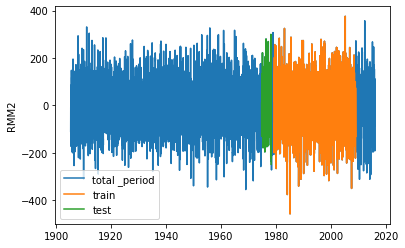

In [46]:
plt.plot(x_test3.iloc[:,0],label = 'total _period')
plt.plot(x_train.iloc[:,0], label = 'train')
plt.plot(x_test.iloc[:,0], label = 'test')
plt.legend()
plt.ylabel('RMM2')

#### scale the data

In [47]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_test3[:])

test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),test_x3.max(),train_y.max(),test_y.max()

(1.0002254305406701,
 1.0000000004960428,
 1.0000000000000002,
 0.9999999999999999,
 0.8836939198705787)

(array([ 2.,  5.,  2.,  9.,  8., 12., 15., 30., 23., 60., 57., 67., 78.,
        70., 96., 70., 70., 75., 89., 77., 61., 69., 56., 43., 27., 24.,
        21.,  8.,  9.,  6.,  8.,  9.,  3.,  4.,  3.]),
 array([0.14393334, 0.16560254, 0.18727175, 0.20894096, 0.23061017,
        0.25227938, 0.27394859, 0.2956178 , 0.317287  , 0.33895621,
        0.36062542, 0.38229463, 0.40396384, 0.42563305, 0.44730226,
        0.46897147, 0.49064067, 0.51230988, 0.53397909, 0.5556483 ,
        0.57731751, 0.59898672, 0.62065593, 0.64232513, 0.66399434,
        0.68566355, 0.70733276, 0.72900197, 0.75067118, 0.77234039,
        0.7940096 , 0.8156788 , 0.83734801, 0.85901722, 0.88068643,
        0.90235564]),
 <a list of 35 Patch objects>)

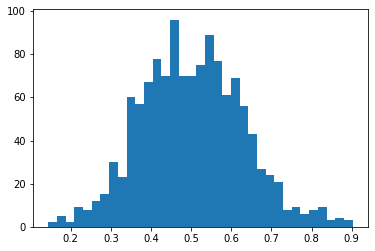

In [48]:
plt.hist(test_x[:,5],bins=35)

In [101]:
#model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))
model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))

In [102]:
model.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

#### Predict from XGBOOST for rmm2

In [103]:
model.fit(train_x, train_y)

Y_prediction_rmm1 = model.predict(test_x)

acc_xgboost       = round(model.score(test_x, test_y) * 100, 2)

print("Accuracy of base Xgboost model is ,",acc_xgboost)

Accuracy of base Xgboost model is , 69.03


training shape = 
(10839, 1)


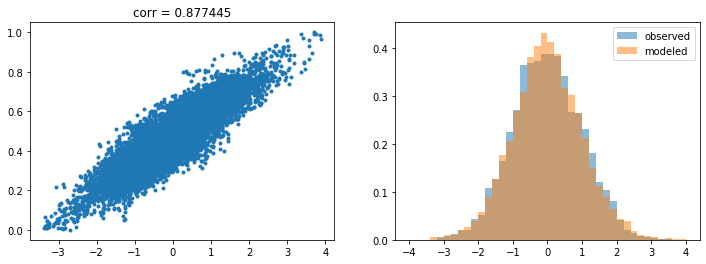

In [104]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(1266, 1)


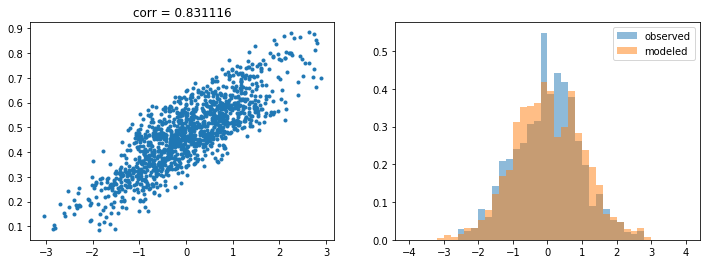

In [105]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

## Support vector regressor

In [54]:
from sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')
regressor = SVR(kernel='rbf',C=5)

regressor.fit(train_x, train_y)

Y_prediction_rmm1 = regressor.predict(test_x)

acc_svr       = round(regressor.score(test_x, test_y) * 100, 2)

print("Accuracy of base SVR model is ,",(acc_svr/100)**0.5)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of base SVR model is , 0.8274055837375042


training shape = 
(10839,)


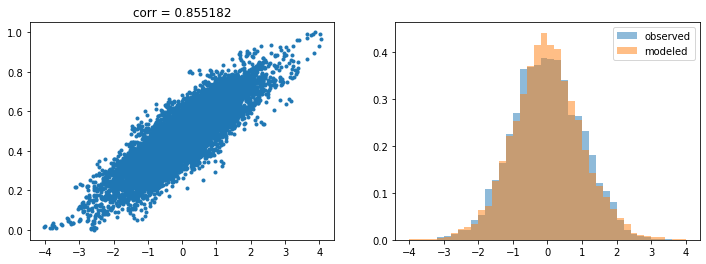

In [55]:
predict1   = regressor.predict(train_x)
yy_train   = sc3.inverse_transform(predict1[:,None])
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(1266,)


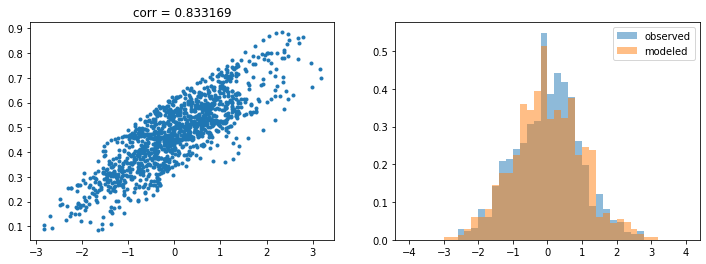

In [56]:
predict2  = regressor.predict(test_x)
yy_test   = sc3.inverse_transform(predict2[:,None])
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [57]:
predict_tot = regressor.predict(test_x3)
predict_tot = sc3.inverse_transform(predict_tot[:,None])
predict_tot = predict_tot/predict_tot.std()

## Neural Network

In [58]:
from keras.optimizers import adadelta
from keras.layers.advanced_activations import LeakyReLU,PReLU
from keras.optimizers import adamax
from keras.wrappers.scikit_learn import KerasRegressor
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1000,  kernel_initializer='random_uniform',
                bias_initializer='zeros',input_dim=train_x.shape[1],activation='relu'))
    regressor.add(Dropout(0.1))
    regressor.add(Dense(units=1000, kernel_initializer='random_uniform',
                bias_initializer='zeros',activation='relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1000, kernel_initializer='random_uniform',
                bias_initializer='zeros',activation='relu'))
    regressor.add(Dropout(0.3))
    regressor.add(Dense(units=1, kernel_initializer='random_uniform',
                bias_initializer='zeros',activation='linear'))
    optimizer = adadelta(lr=0.1,epsilon=1e-8,rho=0.95)
    regressor.compile(optimizer=optimizer, loss='mae')
    return regressor

In [59]:
regressor = KerasRegressor(build_fn=build_regressor, validation_data = (test_x,test_y),batch_size=30,epochs=50)

In [60]:
results = regressor.fit(train_x,train_y,verbose=1)

Train on 10839 samples, validate on 1266 samples
Epoch 1/50
10839/10839 [==============================] - 3s 279us/step - loss: 0.1187 - val_loss: 0.0867
Epoch 2/50
10839/10839 [==============================] - 3s 256us/step - loss: 0.0870 - val_loss: 0.0692
Epoch 3/50
10839/10839 [==============================] - 3s 271us/step - loss: 0.0806 - val_loss: 0.0711
Epoch 4/50
10839/10839 [==============================] - 3s 257us/step - loss: 0.0773 - val_loss: 0.0669
Epoch 5/50
10839/10839 [==============================] - 3s 259us/step - loss: 0.0747 - val_loss: 0.0676
Epoch 6/50
10839/10839 [==============================] - 3s 251us/step - loss: 0.0729 - val_loss: 0.0822
Epoch 7/50
10839/10839 [==============================] - 3s 251us/step - loss: 0.0715 - val_loss: 0.0661
Epoch 8/50
10839/10839 [==============================] - 3s 252us/step - loss: 0.0706 - val_loss: 0.0707
Epoch 9/50
10839/10839 [==============================] - 3s 246us/step - loss: 0.0696 - val_loss: 0.06

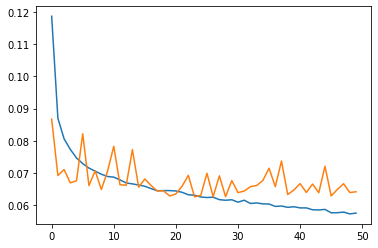

In [61]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])


training shape = 
(10839,)


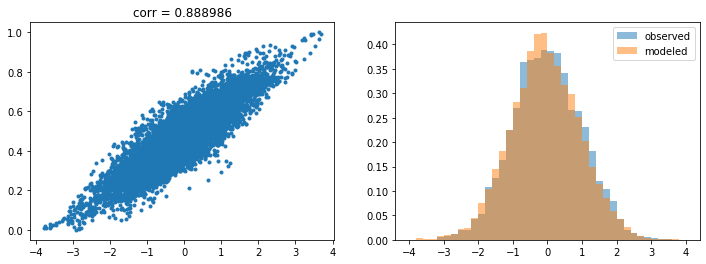

In [62]:
predict1   = regressor.predict(train_x)
yy_train   = sc3.inverse_transform(predict1.reshape(predict1.shape[0],1))
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(1266,)


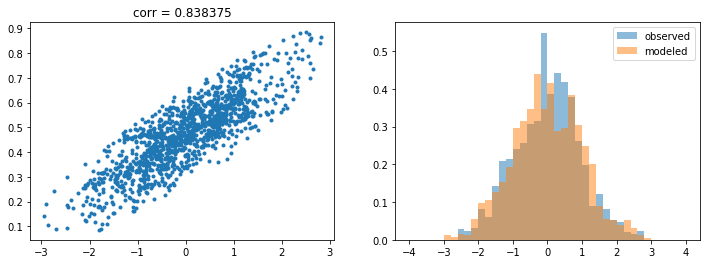

In [63]:
predict2  = regressor.predict(test_x)
yy_test   = sc3.inverse_transform(predict2.reshape(predict2.shape[0],1))
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [64]:
## LSTM

train_x_t = train_x[:,:,None]
test_x_t = test_x[:,:,None]

from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional
from keras.optimizers import Adam
import keras.backend as K


np.random.seed(7)

K.clear_session()
model = Sequential()

model.add(Bidirectional(LSTM(40, input_shape=(24,1))))
model.add(Dropout(0.2))
model.add(Dense(units=1000,  kernel_initializer='random_uniform',
                bias_initializer='zeros',input_dim=train_x.shape[1],activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1000, kernel_initializer='random_uniform',
            bias_initializer='zeros',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1000, kernel_initializer='random_uniform',
            bias_initializer='zeros',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, kernel_initializer='random_uniform',
            bias_initializer='zeros',activation='linear'))
#model.add(Dense(1))
optimizer = adadelta(lr=0.1,epsilon=1e-8,rho=0.95)
#model.compile(loss='mae', optimizer=Adam(lr=0.001,decay=0.0001))
model.compile(loss='mae', optimizer=optimizer)
model.fit(train_x_t, train_y, validation_data=(test_x_t, test_y), epochs=100, verbose=1)

Train on 10839 samples, validate on 1266 samples
Epoch 1/100
10839/10839 [==============================] - 7s 636us/step - loss: 0.1472 - val_loss: 0.1079
Epoch 2/100
10839/10839 [==============================] - 6s 527us/step - loss: 0.1192 - val_loss: 0.1074
Epoch 3/100
10839/10839 [==============================] - 6s 515us/step - loss: 0.1177 - val_loss: 0.1082
Epoch 4/100
10839/10839 [==============================] - 6s 521us/step - loss: 0.1165 - val_loss: 0.1098
Epoch 5/100
10839/10839 [==============================] - 6s 525us/step - loss: 0.1153 - val_loss: 0.1069
Epoch 6/100
10839/10839 [==============================] - 6s 524us/step - loss: 0.1141 - val_loss: 0.1079
Epoch 7/100
10839/10839 [==============================] - 6s 520us/step - loss: 0.1136 - val_loss: 0.1040
Epoch 8/100
10839/10839 [==============================] - 6s 522us/step - loss: 0.1126 - val_loss: 0.1017
Epoch 9/100
10839/10839 [==============================] - 6s 515us/step - loss: 0.1115 - val_l

KeyboardInterrupt: 

test shape = 
(1266, 1)


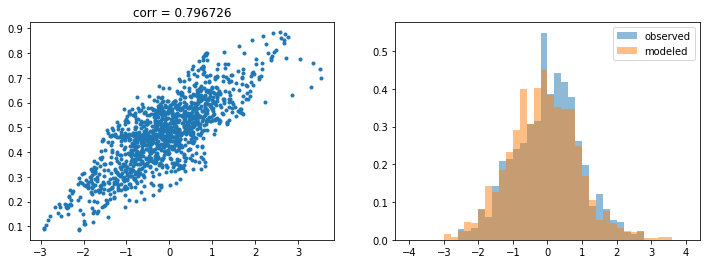

In [42]:
predict2  = model.predict(test_x_t)
yy_test   = sc3.inverse_transform(predict2.reshape(predict2.shape[0],1))
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

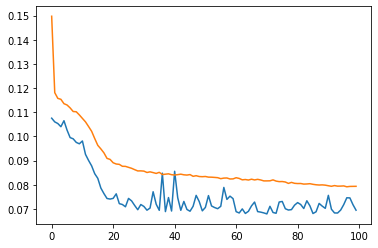

In [43]:
model.history.history.keys()

plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])